<a href="https://www.bigdatauniversity.com"><img src="img/Cognitive-Class-Logo.png" width = 400, align = "center"></a>
# <center>Análisis de Regresión no Lineal</center>

Si los datos muestran tendencias curas, entonces la regresión lineal no producirá resultados muy exactos cuando se comparan con una regresión no lineal, porque, como su nombre lo indica, la regresión lineal sume que los datos son lineales. 
Aprendamos sobre regresiones no lineales y apliquemos un ejemplo en python. En este lab, conectaremos un modelo no lineal con los puntos de tendencia correspondientes al GDP de China entre los años 1960 y 2014.

### Importando las librerías requeridas

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Aunque la regresión lineal es muy buena para resolver varios problemas, no puede utilizarse en todos los sets de datos. Primero, recordemos cómo funciona la regresión lineal, se podría modelar un set de datos. Modelar una relación lineal entre una variable dependiente y una variable independiente x, tendría una simple ecuación de grado 1, por ejemplo y = 2*(x) + 3.

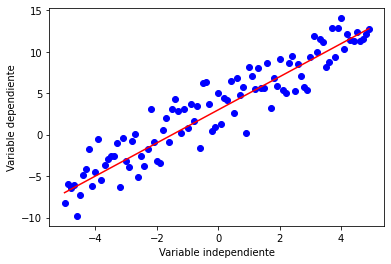

In [4]:
x = np.arange(-5.0, 5.0, 0.1)

##Se puede ajustar la pendiente y la intersección para verificar los cambios en el gráfico
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Variable dependiente')
plt.xlabel('Variable independiente')
plt.show()

Las regresiones no-lineales son una relación entre variables independientes $x$ y una variable dependiente $y$ que resulta en una función no lineal. Básicamente, cada relación que no es lineal puede transformarse en una no lineal, y generalmente se representa con el polinomio de grados $k$ (potencia máxima de $x$). 

$$ \ y = a x^3 + b x^2 + c x + d \ $$

Las funciones no lineales pueden tener elementos como exponentes, logaritmos, fracciones y otros. Por ejemplo: $$ y = \log(x)$$
    
O más complicados, como :
$$ y = \log(a x^3 + b x^2 + c x + d)$$

Miremos el gráfico de la función cúbica.

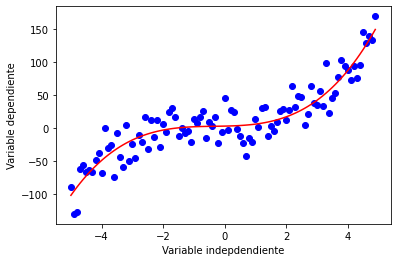

In [5]:
x = np.arange(-5.0, 5.0, 0.1)

##Puede ajustar la pendiente y la intersección para verificar los cambios del gráfico
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Variable dependiente')
plt.xlabel('Variable indepdendiente')
plt.show()

Como se puede ver, esta función tiene $x^3$ y $x^2$ como variables independientes. También, el gráfico de esta función no es una linea directa, por lo que es una función no lineal.

Algunas otras funciones no lineales son:

### Cuadrática

$$ Y = X^2 $$

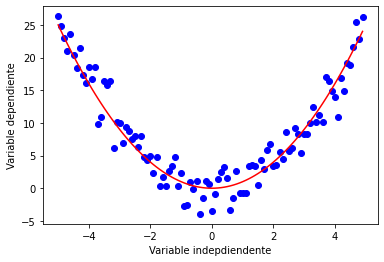

In [6]:
x = np.arange(-5.0, 5.0, 0.1)

##Se puede ajustar la pendiente y la intersección para verificar los cambios en el gráfico

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Variable dependiente')
plt.xlabel('Variable indepdiendente')
plt.show()

### Exponencial

Una función exponencial con base c se define por $$ Y = a + b c^X$$ donde b ≠0, c > 0 , c ≠1, y x es cualquier número real. La base, c, es constante y el exponente, x, es una variable. 



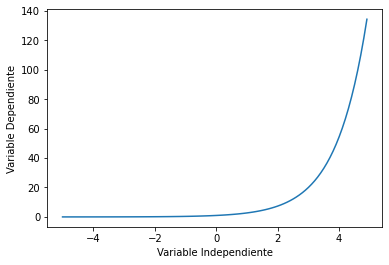

In [7]:
X = np.arange(-5.0, 5.0, 0.1)

##Se puede ajustar la pendiente y la intersección para verificar los cambios en el gráfico

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Variable Dependiente')
plt.xlabel('Variable Independiente')
plt.show()

### Logarítmico

La respuesta $y$ es el resultado de aplicar el mapa logarítmico desde el valor de entrada de $x$ a la variable de salida $y$. Es una de las formas más simples de __log()__: i.e. $$ y = \log(x)$$

Favor, considerar que en vez de $x$, podemos usar $X$, el cual puede ser una representación polinomial de las $x$'s. En su forma general, se escribiría como  
\begin{equation}
y = \log(X)
\end{equation}

<ipython-input-12-225a23f8f1eb>:3: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


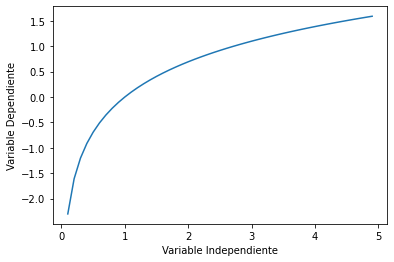

In [12]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Variable Dependiente')
plt.xlabel('Variable Independiente')
plt.show()

### Sigmoidal/Logística

$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

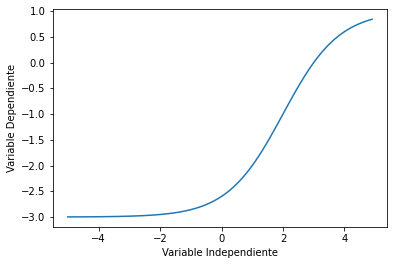

In [13]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Variable Dependiente')
plt.xlabel('Variable Independiente')
plt.show()

<a id="ref2"></a>
# Ejemplo de Regresión No-Lineal

Por ejemplo, intentaremos fijar un modelo no lineal a los puntos correspondientes al GDP de China entre los años 1960 y 2014. Descargaremos un set de datos con dos columnas, la primera, un año entre 1960 y 2014, la segunda, el ingreso anual de China en dólares estadounidenses para ese año. 

In [15]:
import numpy as np
import pandas as pd

#downloading dataset
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
    
df = pd.read_csv("china_gdp.csv")
df.head(10)

2020-10-07 11:52:47 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


__¿Sabías?__ Cuando se trata de Machine Learning, seguro trabajarás con grandes datasets (juego de datos). Entonces, ¿dónde podrás guardar esos datos? IBM ofrece una oportunidad única para las empresas, con 10 Tb de IBM Cloud Object Storage: [Registrate ahora gratuitamente](http://cocl.us/ML0101EN-IBM-Offer-CC)

### Marcando el set de datos ###
Asi es como los puntos de datos se ven. Se parece a una función lógica o exponencial. El crecimiento es leve, luego a partir de 2005 en adelante, el crecimiento ya es más notorio. Y finalmente, desacelera suavemente a principio del año 2010.

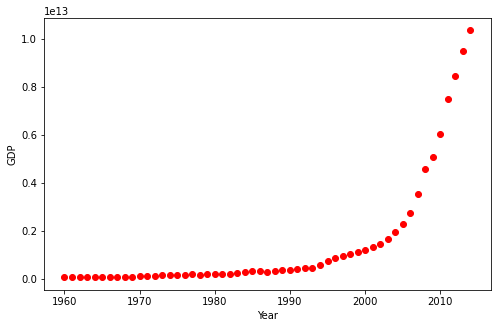

In [16]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

### Eligiendo un modelo ###

A primera vista, determinamos que la función lógica podría ser una buena primera aproximación,
ya que tiene la propiedad de comenzar con un crecimiento leve, aumentando en el medio y luego descendiendo nuevamente hacia el final; como se ve debajo:

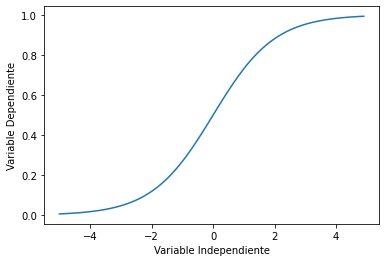

In [17]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Variable Dependiente')
plt.xlabel('Variable Independiente')
plt.show()



La fórumla para la función logística es la siguiente:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controla lo llano de la curva,

$\beta_2$: Lleva la curva sobre el eje x.

### Construyendo el Modelo ###
Ahora, construyamos nuestro modelo de regresión e inicialicemos sus parámetros. 

In [26]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

Aquí, un ejemplo sigmoide que podría cuadrar con los datos:

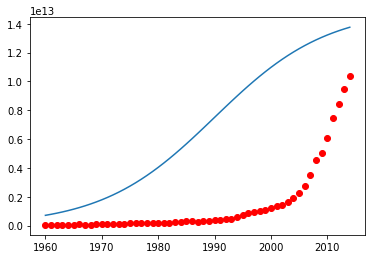

In [20]:
beta_1 = 0.10
beta_2 = 1990.0

#función logística
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#predicción de puntos
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

Nuestra tarea aquí es encontrar los mejores parámetros para nuestro modelo. Normalicemos primero nuestro x e y:

In [21]:
# Normalicemos nuestros datos
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

#### ¿Cómo podemos encontrar los mejores parámetros para nuestra linea?
podemos utilizar __curve_fit__ la cual utiliza cuadrados mínimos no lineales para cuadrar con la función sigmoide. Los valores óptimos para los parámetros que suman los residuos cuadrados de sigmoid(xdata, *popt) - ydata minimizado.

popt son nuestros parámetros optimizados.

In [22]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#imprimir los parámetros finales
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.453017, beta_2 = 0.997207


Ahora dibujamos nuestro modelo de regresión.

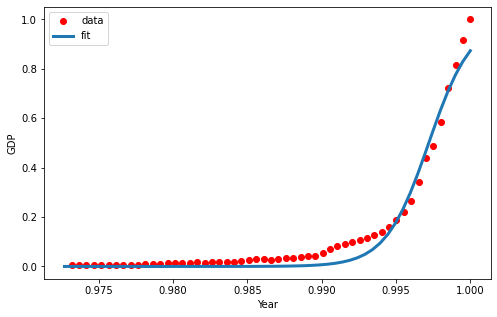

In [23]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Práctica
¿Puedes calcular cual es la exactitud de nuestro modelo?

In [31]:

# divide los datos en entrenamiento y prueba
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# construye el modelo utilizando el set de entrenamiento
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predecir utilizando el set de prueba
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Promedio de error absoluto: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Suma residual de cuadrados (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )




Promedio de error absoluto: 0.03
Suma residual de cuadrados (MSE): 0.00
R2-score: 0.97


## ¿Deseas aprender más?

IBM SPSS Modeler es una plataforma para analytics que contiene varios algoritmos de machine learning. Fue diseñada para acercar inteligencia predictiva a las decisiones hechas por individuos, grupos, sistemas, toda la empresa. Un free trial está disponible a través de este curso en: [SPSS Modeler](http://cocl.us/ML0101EN-SPSSModeler).

Asi mismo, puedes utilizar Watson Studio para ejecutar estos notebooks más rápido y con datasets más grandes. Watson Studio es una solución en la nube lider de IBM's para científicos de datos, construída por científicos de datos. Con Jupyter notebooks, RStudio, Apache Spark y librerías conocidas pre instaladas en la nube, Watson Studio posibilita a los científicos de datos colaborar en sus proyectos sin tener que instalar nada. Sumate a la comunidad de usuarios Watson Studio hoy mismo por medio de una cuenta gratuita en [Watson Studio](https://cocl.us/ML0101EN_DSX)

### ¡Gracias por completar esta lección!

Notebook creado por: <a href = "https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>

<hr>
Copyright &copy; 2018 [Cognitive Class](https://cocl.us/DX0108EN_CC). Este lab y su código fuente fueron registrados bajo los términos de [MIT License](https://bigdatauniversity.com/mit-license/).​